In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('bank.xlsx')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# No null values in the data

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
# Removing the outliers from columns:
# age, balance, day, duration, campaign, pdays, previous

In [7]:
def cal_lf_uf(q1, q3):
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    uf = q3+(1.5*IQR)
    print("lf-->", lf, "uf-->", uf)
    return [lf, uf]

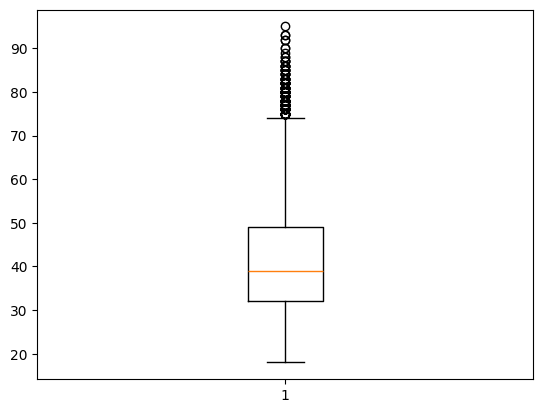

In [8]:
plt.boxplot(data['age'])
plt.show()

In [9]:
[lf, uf] = cal_lf_uf(32.000000, 49.000000)

lf--> 6.5 uf--> 74.5


In [10]:
data['age'] = np.where(data['age']>uf, uf, data['age'])
data['age'] = np.where(data['age']<lf, lf, data['age'])

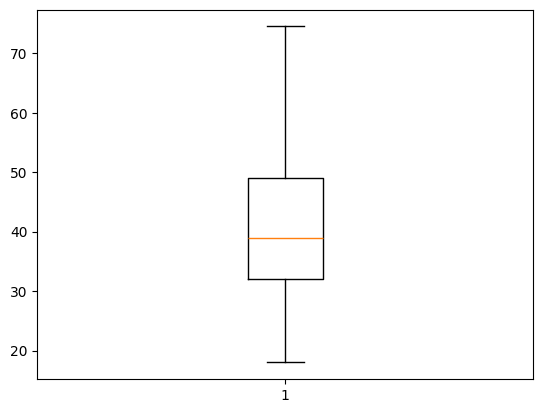

In [11]:
plt.boxplot(data['age'])
plt.show()

In [12]:
[lf, uf] = cal_lf_uf(122.000000, 1708.000000)

lf--> -2257.0 uf--> 4087.0


In [13]:
data['balance'] = np.where(data['balance']>uf, uf, data['balance'])
data['balance'] = np.where(data['balance']<lf, lf, data['balance'])

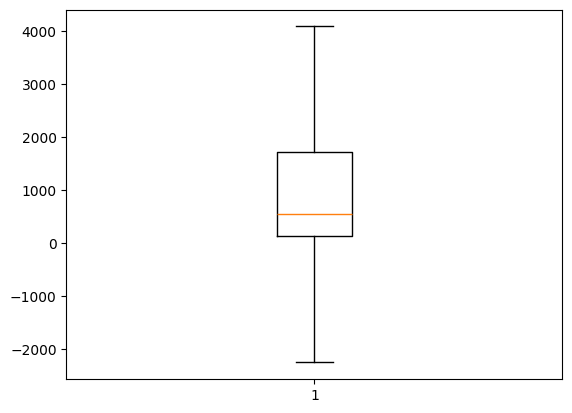

In [14]:
plt.boxplot(data['balance'])
plt.show()

In [15]:
[lf, uf] = cal_lf_uf(8.000000, 22.000000)

lf--> -13.0 uf--> 43.0


In [16]:
data['day'] = np.where(data['day']>uf, uf, data['day'])
data['day'] = np.where(data['day']<lf, lf, data['day'])

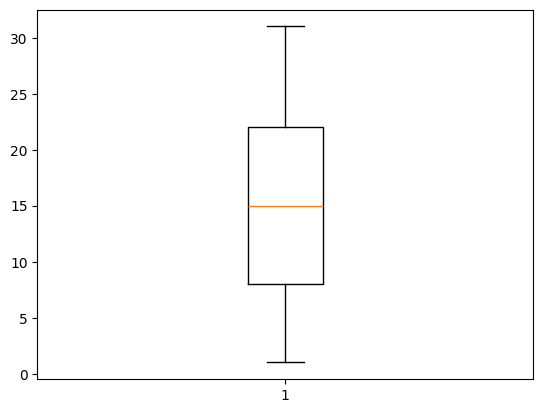

In [17]:
plt.boxplot(data['day'])
plt.show()

In [18]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.152347,1117.352804,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.659113,1349.670734,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-2257.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,74.500000,4087.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [19]:
[lf, uf] = cal_lf_uf(138.000000, 496.000000)

lf--> -399.0 uf--> 1033.0


In [20]:
data['duration'] = np.where(data['duration']>uf, uf, data['duration'])
data['duration'] = np.where(data['duration']<lf, lf, data['duration'])

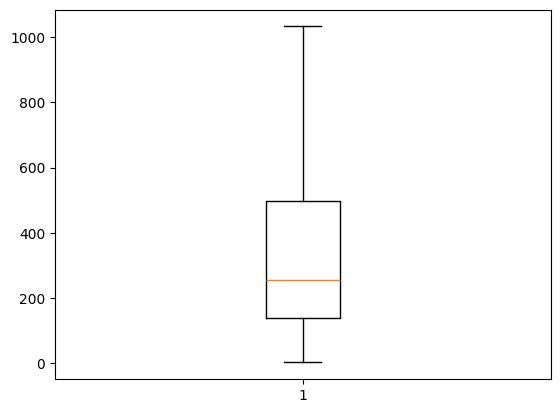

In [21]:
plt.boxplot(data['duration'])
plt.show()

In [22]:
[lf, uf] = cal_lf_uf(1.000000, 3.000000)

lf--> -2.0 uf--> 6.0


In [23]:
data['campaign'] = np.where(data['campaign']>uf, uf, data['campaign'])
data['campaign'] = np.where(data['campaign']<lf, lf, data['campaign'])

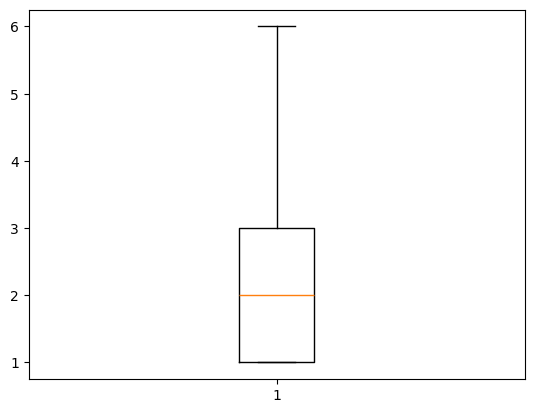

In [24]:
plt.boxplot(data['campaign'])
plt.show()

In [25]:
[lf, uf] = cal_lf_uf(-1.000000, 20.750000)

lf--> -33.625 uf--> 53.375


In [26]:
data['pdays'] = np.where(data['pdays']>uf, uf, data['pdays'])
data['pdays'] = np.where(data['pdays']<lf, lf, data['pdays'])

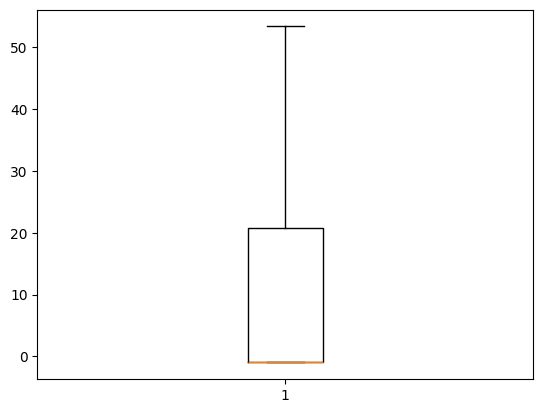

In [27]:
plt.boxplot(data['pdays'])
plt.show()

In [28]:
[lf, uf] = cal_lf_uf(0.000000, 1.000000)

lf--> -1.5 uf--> 2.5


In [29]:
data['previous'] = np.where(data['previous']>uf, uf, data['previous'])
data['previous'] = np.where(data['previous']<lf, lf, data['previous'])

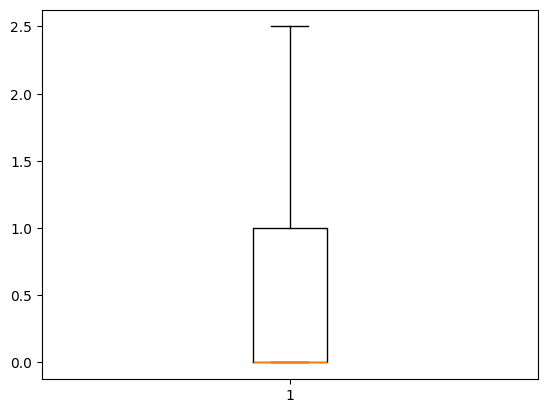

In [30]:
plt.boxplot(data['previous'])
plt.show()

In [31]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.152347,1117.352804,15.658036,352.948486,2.238577,12.578413,0.485397
std,11.659113,1349.670734,8.420740,284.714889,1.521158,23.466393,0.892563
min,18.000000,-2257.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,74.500000,4087.000000,31.000000,1033.000000,6.000000,53.375000,2.500000


Text(0, 0.5, 'balance')

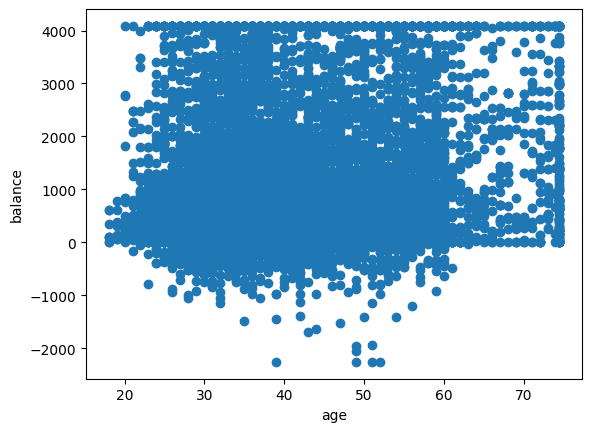

In [32]:
plt.scatter(data['age'], data['balance'])
plt.xlabel('age')
plt.ylabel('balance')



In [33]:
data.drop(columns=["pdays"], inplace=True)
data.drop(columns=["month", "day"], inplace=True)
data.drop(columns=["contact"], inplace=True)

In [34]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343.0,yes,no,1033.0,1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,1033.0,1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,1033.0,1.0,0.0,unknown,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,579.0,1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,673.0,2.0,0.0,unknown,yes


In [35]:
data.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'deposit'],
      dtype='object')

In [36]:
df = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'deposit'], drop_first=True)

In [37]:
df.head(10)

,age,balance,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59.0,2343.0,1033.0,1.0,0.0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,56.0,45.0,1033.0,1.0,0.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,41.0,1270.0,1033.0,1.0,0.0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
3,55.0,2476.0,579.0,1.0,0.0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
4,54.0,184.0,673.0,2.0,0.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True
5,42.0,0.0,562.0,2.0,0.0,False,False,False,True,False,...,False,True,False,False,True,True,False,False,True,True
6,56.0,830.0,1033.0,1.0,0.0,False,False,False,True,False,...,False,True,False,False,True,True,False,False,True,True
7,60.0,545.0,1030.0,1.0,0.0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,True
8,37.0,1.0,608.0,1.0,0.0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
9,28.0,4087.0,1033.0,3.0,0.0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True


In [38]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'deposit_yes'],
      dtype='object')

In [39]:
y = df['deposit_yes']
x = df[['age', 'balance', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

In [41]:
model_Decision_Tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=3, random_state=88)

In [42]:
model_Decision_Tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=3,
                       random_state=88)

In [43]:
print("Training accuracy score" , model_Decision_Tree.score(x_train, y_train))

Training accuracy score 0.795721805353343


In [44]:
print("Test accuracy score" , model_Decision_Tree.score(x_test, y_test))

Test accuracy score 0.8096730855351545
